In [10]:
import os
import pickle
import shutil
import warnings
import random as random
import numpy as np
import pandas as pd
import seaborn as sns

# Matplotlib Imports
import matplotlib  
import matplotlib.pyplot as plt
matplotlib.use(u'nbAgg')
%matplotlib inline

import multiprocessing
from multiprocessing import Process

# This is used for file operations
import codecs  

In [115]:
original_file = 'csv'

file_folder = original_file + '_dataset'
text_file_folder = original_file + '_text_format'
file_extension = '.' + original_file
csv_file = original_file + '.csv' 
file_histogram = original_file + '.png'

In [116]:
data_path = "deeplearning"

byte_destination = os.path.join(data_path, file_folder)
text_destination = os.path.join(data_path, text_file_folder)
csv_file =  os.path.join(data_path, csv_file)

In [117]:
if not os.path.exists(text_destination):
    os.makedirs(text_destination)

In [118]:
def get_whole_file_size(byte_destination, original_file, text_destination, file_extension):
    
    files = os.listdir(byte_destination)
    filenames = []
    array = []
    
    for file in files:
    
        if(file.endswith(original_file)):
    
            file = file.split('.')[0]
            text_file = open (os.path.join(text_destination, file) + ".txt", 'w+')
    
            try:
                with open(os.path.join(byte_destination, file) + file_extension, "rb") as fp:
        
                    content = fp.read().hex()
                    content = content[4:-4]
                    values = [content[i:i+2] for i in range(0,len(content), 2)]
        
                    for line in values:
                        text_file.write(line)
                        text_file.write(" ")
        
                    fp.close()
                #os.remove(os.path.join(byte_destination, file) + ".doc")
            
            except OSError as e:
                print('Error:', e)
                continue
            
            text_file.close()

In [119]:
def get_specific_file_size(byte_destination, original_file, text_destination, file_extension, size):

    files = os.listdir(byte_destination)
    filenames = []
    array = []

    for file in files:
        if file.endswith(original_file):
            file = file.split('.')[0]
            text_file = open(os.path.join(text_destination, file) + ".txt", 'w+')

            try:
                with open(os.path.join(byte_destination, file) + file_extension, "rb") as fp:
                    file_size = os.path.getsize(os.path.join(byte_destination, file) + file_extension)
                
                    content = fp.read().hex()
                    content = content[4:-4]
                
                    if file_size >= size:
                        start_position = random.randint(0, file_size - size)
                        fp.seek(start_position)
                        content = fp.read(size).hex()
                   
                        values = [content[i:i+2] for i in range(0,len(content), 2)]

                        for byte_value in values:
                            text_file.write(byte_value)
                            text_file.write(" ")

                    fp.close()
                

            except OSError as e:
                print('Error:', e)
                continue

            text_file.close()

In [120]:
#get_whole_file_size(byte_destination, original_file, text_destination, file_extension)
get_specific_file_size(byte_destination, original_file, text_destination, file_extension, 1024) #512

In [121]:
files = os.listdir(text_destination)
filenames2 = []
feature_matrix = np.zeros((len(files), 257),dtype=int)
k = 0

# Program to convert into bag of words of bytefiles
# This is custom-built bag of words this is unigram bag of words
byte_feature_file = open(csv_file, 'w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")

byte_feature_file.write("\n")

for file in files:
    filenames2.append(file)
    byte_feature_file.write(file + ",")
    if(file.endswith("txt")):
        try:
            with open(os.path.join(text_destination, file), "r") as byte_file:
                for lines in byte_file:
                    line = lines.rstrip().split(" ")
                    for hex_code in line:
                        if hex_code == '??': feature_matrix[k][256] += 1
                        else: feature_matrix[k][int(hex_code,16)] += 1
            byte_file.close()
        except OSError as e:
            print('Error:', e)
            continue
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i) + ",")
    byte_feature_file.write("\n")
    k += 1

byte_feature_file.close()

In [122]:
byte_features = pd.read_csv(csv_file, sep=",", index_col=False)

byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features = byte_features.drop("??", 1)


byte_features.tail()


C:\Users\Razaq\AppData\Local\Temp\ipykernel_15572\1305725586.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  byte_features = byte_features.drop("??", 1)


,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
563,059828,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,059882,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,060084,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,060553,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,060979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
byte_features.loc[byte_features['20'] > 0]

,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,000081,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000082,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000084,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000086,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,020995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,020996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,020997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,020998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [ ]:
#df1 = normalize(byte_features)

df1 = byte_features

In [ ]:
df1.loc['total'] = byte_features.select_dtypes(pd.np.number).sum()

df1 = df1.replace(np.nan, 'total', regex=True)

df1.tail()

C:\Users\Razaq\AppData\Local\Temp\ipykernel_9580\388508820.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df1.loc['total'] = byte_features.select_dtypes(pd.np.number).sum()


,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
3220,020996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3221,020997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3222,020998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3223,020999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,total,10357.0,388.0,3.0,0.0,13.0,0.0,1.0,512.0,8.0,...,623.0,12.0,54.0,11.0,46.0,216.0,5793.0,7.0,116.0,10.0


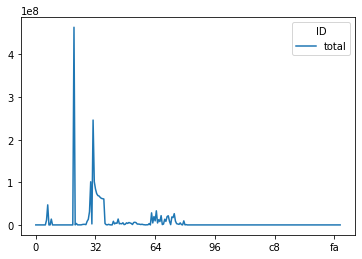

<Figure size 432x288 with 0 Axes>

In [ ]:
df1.query('ID == "total"').set_index('ID').T.plot()
fig = plt.figure()
fig.canvas.manager.full_screen_toggle() # toggle fullscreen mode

fig.savefig(file_histogram)